# Kaggle: Highest Grossing Movies|

Este conjunto de datos se obtuvo de la plataforma [Kaggle](https://www.kaggle.com/sanjeetsinghnaik/top-1000-highest-grossing-movies), contiene información sobre las 1000 películas más taquilleras de Hollywood actualizada al 10 de Enero de 2022. 
Esta inflormación pretende ilustrar algunas de las técnicas que se aplican en análisis de datos. 

### Análisis exploratorio de Datos

#### Inspección de datos

Se cargaron los datos en la variable `movies`. 

In [1]:
import pandas as pd 

In [2]:
movies = pd.read_csv('Highest Holywood Grossing Movies.csv', index_col=[0])
print(movies.head())

                                               Title  \
0  Star Wars: Episode VII - The Force Awakens (2015)   
1                           Avengers: Endgame (2019)   
2                                      Avatar (2009)   
3                               Black Panther (2018)   
4                      Avengers: Infinity War (2018)   

                                          Movie Info  \
0  As a new threat to the galaxy rises, Rey, a de...   
1  After the devastating events of Avengers: Infi...   
2  A paraplegic Marine dispatched to the moon Pan...   
3  T'Challa, heir to the hidden but advanced king...   
4  The Avengers and their allies must be willing ...   

                           Distributor       Release Date  \
0  Walt Disney Studios Motion Pictures  December 16, 2015   
1  Walt Disney Studios Motion Pictures     April 24, 2019   
2                Twentieth Century Fox  December 16, 2009   
3  Walt Disney Studios Motion Pictures                NaN   
4  Walt Disney Studio

#### Limpieza de datos

Se renombraron las columnas con nombres cómodos y adecuados para variables. 

In [3]:
column_names = movies.columns 
column_names = [i.lower().replace(' ', '_').replace('_(in_$)', '') for i in column_names]
movies.columns=column_names
print(movies.columns)

Index(['title', 'movie_info', 'distributor', 'release_date', 'domestic_sales',
       'international_sales', 'world_sales', 'genre', 'movie_runtime',
       'license'],
      dtype='object')


#### Resumen estadístico

La función `describe` se utiliza para revisar los datos más cuidadosamente. Al utilizarlo, vemos la algunas estadísticas para las columnas `domestic_sales`, `international_sales` y `world_sales`, que son las que guardan valores numéricos. 

In [4]:
movies.describe(include='all')

,title,movie_info,distributor,release_date,domestic_sales,international_sales,world_sales,genre,movie_runtime,license
count,918,918,918,800,9.180000e+02,9.180000e+02,9.180000e+02,918,918,744
unique,918,918,34,740,NaN,NaN,NaN,309,101,4
top,Michael (1996),Journalist Mikael Blomkvist is aided in his se...,Warner Bros.,"November 19, 1999",NaN,NaN,NaN,"['Action', 'Adventure', 'Sci-Fi']",1 hr 55 min,PG-13
freq,1,1,158,3,NaN,NaN,NaN,56,24,363
mean,NaN,NaN,NaN,NaN,1.677469e+08,2.301434e+08,3.968668e+08,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.040360e+08,2.176011e+08,3.082629e+08,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,8.036084e+07,2.600000e+02,8.160000e+07,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.016071e+08,8.845620e+07,2.005564e+08,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,1.321351e+08,1.638819e+08,3.019416e+08,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,1.913905e+08,2.885577e+08,4.750718e+08,NaN,NaN,NaN


Ahora, se visualiza la cantidad de objetos null.

In [5]:
print(movies.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 917
Data columns (total 10 columns):
title                  918 non-null object
movie_info             918 non-null object
distributor            918 non-null object
release_date           800 non-null object
domestic_sales         918 non-null int64
international_sales    918 non-null int64
world_sales            918 non-null int64
genre                  918 non-null object
movie_runtime          918 non-null object
license                744 non-null object
dtypes: int64(3), object(7)
memory usage: 78.9+ KB
None


#### Visualización de los datos

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

En la siguiente gráfica notamos que la compañía distribuidora con más películas taquilleras es Warner Bros, seguido de Walt Disney Studios Motion Pictures y en tercer lugar Universal Pictures. 

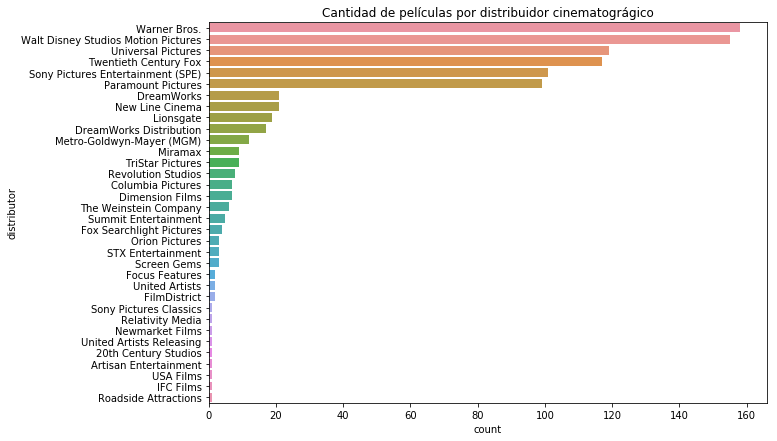

In [8]:
plt.figure(figsize=(10, 7))
sns.countplot(y = 'distributor', data=movies, order=movies.distributor.value_counts(ascending=False).index)
plt.title('Cantidad de películas por distribuidor cinematográgico')
plt.show()

Para observar los años con películas más taquilleras, deberemos extraer el año de la columna `release_date`. 
Primero se borran los renglones con valores null de la columna `release_date` y se guarda el DataFrame con toda la información de las películas en un nuevo DataFrame `movies1`.
Inspeccionando este gráfico, se puede observar que el año con más películas taquilleras fue el 2014, seguido del 2013 y luego el 2010. Mientras que el 2021 está entre los años con menos películas taquilleras. 

<Figure size 432x288 with 0 Axes>

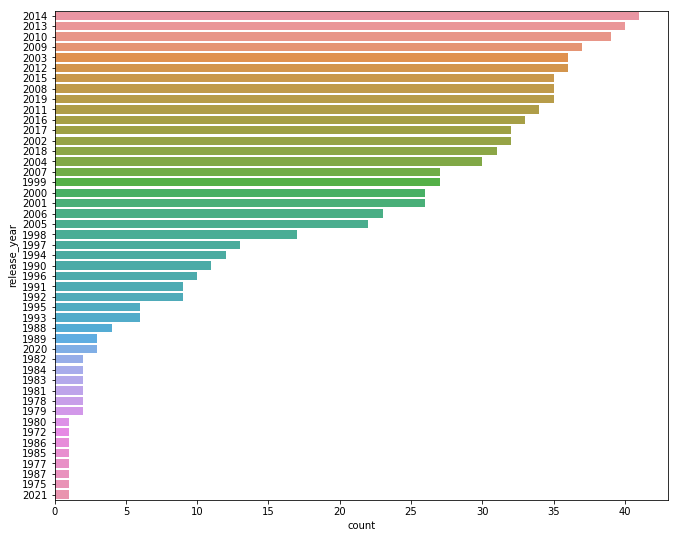

In [9]:
movies1 = movies.dropna(subset=['release_date'])
movies1['release_year'] = movies1.release_date.apply(lambda x: x.split(', ')[-1])

plt.clf()
plt.figure(figsize=(11, 9))
sns.countplot(y='release_year', data=movies1, order=movies1.release_year.value_counts(ascending=False).index)
plt.show()

In [10]:
print(min(movies1['release_year']), max(movies1['release_year']))


1972 2021


Si se agrupan los datos por compañía distribuidora y se calcula el promedio de ventas locales, internacionales y mundiales (`domestic_sales`, `international_sales` y `world_sales`), se puede conocer la cantidad promedio de dólares recaudados por cada categoría entre 1972 y 2021. 

In [11]:
df1 = movies.groupby('distributor').domestic_sales.mean().reset_index()
df2 = movies.groupby('distributor').international_sales.mean().reset_index()
df3 = movies.groupby('distributor').world_sales.mean().reset_index()
distributors_sales = pd.merge(df1, pd.merge(df2,df3, how='outer'), how='outer')
print(distributors_sales.head())

             distributor  domestic_sales  international_sales   world_sales
0   20th Century Studios    1.216266e+08         2.098772e+08  3.315038e+08
1  Artisan Entertainment    1.405391e+08         1.081000e+08  2.486391e+08
2      Columbia Pictures    1.366125e+08         9.720275e+07  1.963157e+08
3        Dimension Films    9.883934e+07         7.587568e+07  1.747150e+08
4             DreamWorks    1.924073e+08         3.034487e+08  4.958560e+08


La función count() permite saber la cantidad de datos que tenemos por renglón en cada columna del DataFrame `distributors_sales`.

In [12]:
distributors_sales.count()

distributor            34
domestic_sales         34
international_sales    34
world_sales            34
dtype: int64

A continuación, se hace un gráfico de barras lado a lado para comparar las ventas promedio de cada distribuidor cinematográfico en los diferentes alcances: local, internacional y mundial. 

<Figure size 432x288 with 0 Axes>

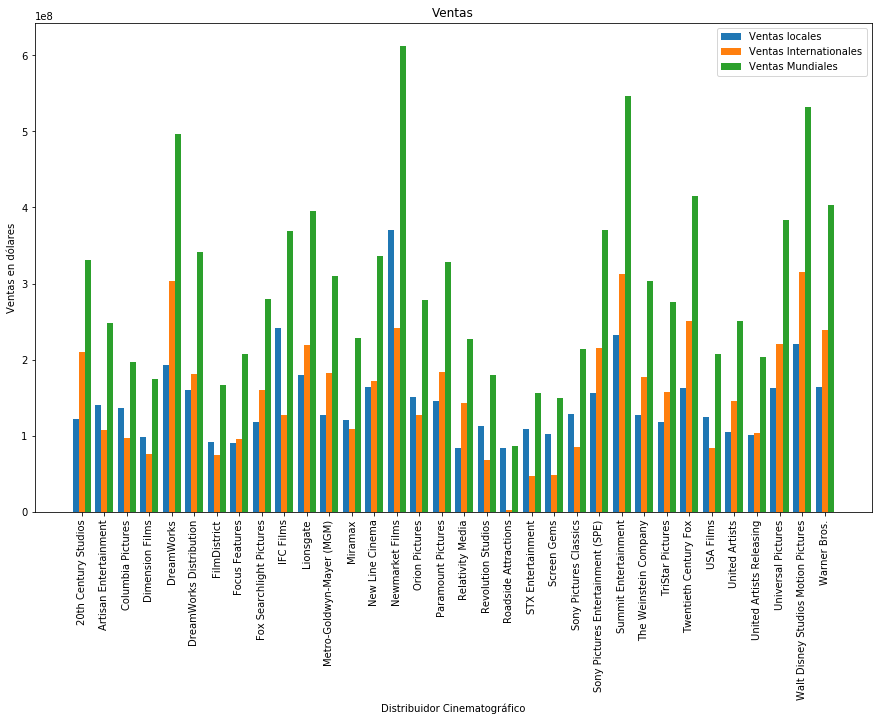

In [13]:
plt.clf()
n=1
t=3
d=34
w=0.8

x_values1=[t*element+w*n for element in range(d)]

n=2

x_values2=[t*element+w*n for element in range(d)]

n=3

x_values3=[t*element+w*n for element in range(d)]

plt.figure(figsize=(15,9))
ax=plt.subplot()
#yerr = distributors_sales.domestic_sales.std()
plt.bar(x_values1, distributors_sales.domestic_sales)#, yerr=yerr, capsize=2)
#yerr = distributors_sales.international_sales.std()
plt.bar(x_values2, distributors_sales.international_sales)#, yerr=yerr, capsize=2)
#yerr = distributors_sales.world_sales
plt.bar(x_values3, distributors_sales.world_sales)#, yerr=yerr, capsize=2)
ax.set_xticks(x_values2)
ax.set_xticklabels(distributors_sales.distributor, rotation=90)
plt.legend(['Ventas locales', 'Ventas Internationales', 'Ventas Mundiales'])
plt.xlabel('Distribuidor Cinematográfico')
plt.ylabel('Ventas en dólares')
plt.title('Ventas')
plt.show()

La gráfica anterior permite observar que en promedio, el distribuidor cinematográfico con más ventas mundiales es Newmarket Films a pesar de que Warner Bross es la que tiene las peliculas más taquilleras. Es decir, aunque Newmarket Films tiene muy pocas películas taquilleras, es el que, en promedio, ha recaudado más dinero. 

### ML: Clasificación 

Se quiere saber si la duración de la película está directamente relacionado con las ventas mundiales obtenidas. 
Para ello, se eligió el algoritmo de machine learning K-Nearest Neighbors en el que los datos de interés son las columnas `movie_runtime` y la segunda `world_sales`. 

Primero, se convierten los datos de la columna `movie_runtime` al total de minutos de duración de la película y se guarda en la variable `movie_runtime_minutes`.

In [14]:
df_aux = pd.DataFrame()
df_aux = movies.apply(lambda row: row.movie_runtime.split(), axis=1)
movies['movie_runtime_minutes'] = df_aux.apply(lambda row: 
                                               float(row[0])*60+float(row[2]) 
                                               if len(row) == 4 
                                               else float(row[0])*60)

Después, se clasifica en tres grupos: 

1 - Películas con buenas ventas. 
2 - Películas con ventas medias. 
3 - Películas con ventas malas. 

Para obtener cada grupo, se restó la menor venta de la mayor y esta cantidad se dividió en tres. De manera que si la cantidad de la variable `world_sales` está entre la mayor venta y la venta media, cae en el grupo 1, si está entre la venta media y la venta mala, cae en el grupo 2 y si es menor que la venta mala, cae en el grupo 3. 

In [15]:
#Tres clasificaciones: buena, media, mala.
good_sales = max(movies.world_sales) - (max(movies.world_sales) - min(movies.world_sales))/3
medium_sales = max(movies.world_sales) - 2*(max(movies.world_sales) - min(movies.world_sales))/3
bad_sales = min(movies.world_sales)

In [16]:
def labels_classification(x):
    if x >= good_sales: 
        return 1
    elif x >= medium_sales and x < good_sales: 
        return 2
    elif x >= bad_sales and x < medium_sales: 
        return 3

movies['labels'] = movies.world_sales.apply(lambda row: labels_classification(row))

Posteriormente, se normalizaron las dos variables `world_sales` y `movie_runtime_minutes` y se guardaron en las variables `world_sales_norm` y `movie_runtime_minutes_norm`. 

In [17]:
#Normalización de la columna world_sales
min1 = min(movies.world_sales)
max1 = max(movies.world_sales)
movies['world_sales_norm'] = movies.apply(lambda row: (row.world_sales-min1)/(max1-min1), axis=1)

#Normalización de la columna movie_runtime_minutes
min1 = min(movies.movie_runtime_minutes)
max1 = max(movies.movie_runtime_minutes)
movies['movie_runtime_minutes_norm'] = movies.apply(lambda row: (row.movie_runtime_minutes - min1)/(max1-min1), axis=1)


Finalmente, se dividen los datos en datos de entrenamiento y de validación. Con lo que se obtuvo un porcentaje de validez del modelo de 99%. 

In [18]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split

In [19]:
training_data, validation_data, training_labels, validation_labels = train_test_split(
    movies[['world_sales_norm', 'movie_runtime_minutes_norm']],
    movies.labels, 
    test_size=0.2, 
    random_state = 50
)

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(training_data, training_labels)
print(classifier.score(validation_data, validation_labels))

0.9945652173913043


Ahora que se sabe que la duración de la película está directamente relacionada con las ventas, se pueden observar también los géneros de las películas del grupo 1, de manera que esos géneros combinados con la duración de estás películas, generarán buenas ventas. 

In [20]:
print(movies[movies.labels==1][['genre', 'movie_runtime_minutes']])

                                          genre  movie_runtime_minutes
0             ['Action', 'Adventure', 'Sci-Fi']                  138.0
1    ['Action', 'Adventure', 'Drama', 'Sci-Fi']                  181.0
2  ['Action', 'Adventure', 'Fantasy', 'Sci-Fi']                  162.0
4             ['Action', 'Adventure', 'Sci-Fi']                  149.0
6                          ['Drama', 'Romance']                  194.0


### Conclusión 

Se observó que entre los años 1972 y 2021, la compañía cinematográfica con más películas es Warner Bros., el año en que hubo más películas taquilleras fue el 2014 y la compañía con más ventas mundiales fue Newmarket Films. 

Con el algoritmo de clasificación, se observó que el tiempo de duración de la película y las ventas están relacionados entre sí, por lo que al revisar los géneros de las películas del grupo 1 se concluye que una combinación de estos géneros con la duración correspondiente a este grupo, podría generar buenas ganancias. 